In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')

x = df.iloc[:, [3,4]].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- Isolation Forest

In [3]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(x_scaled)

In [4]:
n_outliers = (outliers == -1).sum() # -1 = outlier, 1 = normal
print(f"Detected {n_outliers} outliers ({n_outliers/len(x_scaled)*100:.1f}%)")

Detected 20 outliers (10.0%)


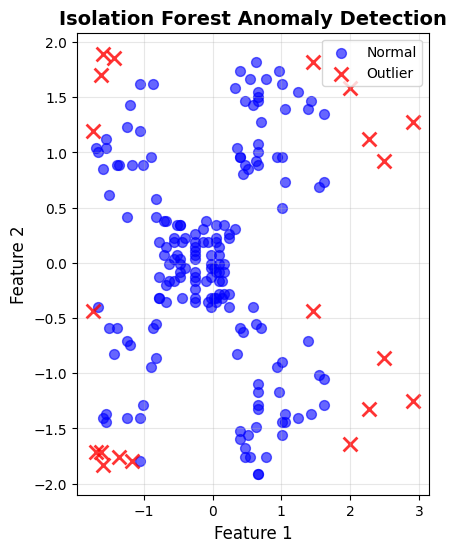

In [5]:
normal_mask = outliers == 1
outlier_mask = outliers == -1

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(x_scaled[normal_mask, 0], x_scaled[normal_mask, 1], 
           c='blue', alpha=0.6, s=50, label='Normal')
plt.scatter(x_scaled[outlier_mask, 0], x_scaled[outlier_mask, 1], c='red', alpha=0.8, s=100, marker='x', linewidths=2, label='Outlier')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Isolation Forest Anomaly Detection', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

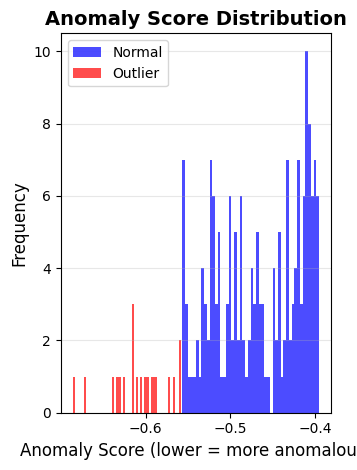

In [10]:
# Anomaly scores
anomaly_scores = iso_forest.score_samples(x_scaled)

plt.subplot(1, 2, 2)
plt.hist(anomaly_scores[normal_mask], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(anomaly_scores[outlier_mask], bins=50, alpha=0.7, label='Outlier', color='red')
plt.xlabel('Anomaly Score (lower = more anomalous)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Anomaly Score Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

- Local Outlier Factor (LOF)

In [13]:
lof = LocalOutlierFactor(contamination=0.1, n_neighbors=20)
outliers_lof = lof.fit_predict(x_scaled)

In [14]:
n_outliers_lof = (outliers_lof == -1).sum()
print(f"LOF detected {n_outliers_lof} outliers")

LOF detected 20 outliers


In [15]:
print("\nMethod Comparison:")
print(f"Isolation Forest: {n_outliers} outliers")
print(f"LOF: {n_outliers_lof} outliers")


Method Comparison:
Isolation Forest: 20 outliers
LOF: 20 outliers


- One-Class SVM

In [16]:
oc_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
outliers_svm = oc_svm.fit_predict(x_scaled)

n_outliers_svm = (outliers_svm == -1).sum()
print(f"One-Class SVM detected {n_outliers_svm} outliers")

One-Class SVM detected 20 outliers
